In [2]:
import regex as re
import pandas as pd
from src.utils.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [3]:
discharge_df = pd.read_csv('data/version1.4_ours/train/discharge.csv.gz', compression='gzip')
target_df = pd.read_csv('data/version1.4_ours/train/discharge_target.csv.gz', compression='gzip')
combined_df = build_combined_discharge(discharge_df, target_df)
final_df = extract_clean_sections_and_count_tokens(combined_df,section_to_next_section.keys())



Removing BHC and DI from the discharge


100%|██████████| 68785/68785 [00:13<00:00, 5260.24it/s]


Extracting features


100%|██████████| 68785/68785 [05:54<00:00, 194.17it/s]


Formating and cleaning sex section


100%|██████████| 68785/68785 [00:03<00:00, 18632.21it/s]


Counting tokens in sex section


100%|██████████| 68785/68785 [00:06<00:00, 10889.56it/s]


Formating and cleaning service section


100%|██████████| 68785/68785 [00:03<00:00, 18553.05it/s]


Counting tokens in service section


100%|██████████| 68785/68785 [00:06<00:00, 10276.60it/s]


Formating and cleaning allergies section


100%|██████████| 68785/68785 [00:03<00:00, 18491.97it/s]


Counting tokens in allergies section


100%|██████████| 68785/68785 [00:12<00:00, 5717.23it/s]


Formating and cleaning chief_complaint section


100%|██████████| 68785/68785 [00:06<00:00, 10021.09it/s]


Counting tokens in chief_complaint section


100%|██████████| 68785/68785 [00:13<00:00, 5007.08it/s]


Formating and cleaning major_surgical_procedures section


100%|██████████| 68785/68785 [00:04<00:00, 16389.15it/s]


Counting tokens in major_surgical_procedures section


100%|██████████| 68785/68785 [00:12<00:00, 5341.60it/s]


Formating and cleaning history_of_present_illness section


100%|██████████| 68785/68785 [00:06<00:00, 9870.80it/s] 


Counting tokens in history_of_present_illness section


100%|██████████| 68785/68785 [02:17<00:00, 498.86it/s]


Formating and cleaning past_medical_history section


100%|██████████| 68785/68785 [00:05<00:00, 12728.00it/s]


Counting tokens in past_medical_history section


100%|██████████| 68785/68785 [00:41<00:00, 1668.29it/s]


Formating and cleaning social_history section


100%|██████████| 68785/68785 [00:04<00:00, 15611.72it/s]


Counting tokens in social_history section


100%|██████████| 68785/68785 [00:11<00:00, 6214.40it/s]


Formating and cleaning family_history section


100%|██████████| 68785/68785 [00:05<00:00, 13260.63it/s]


Counting tokens in family_history section


100%|██████████| 68785/68785 [00:15<00:00, 4425.66it/s]


Formating and cleaning physical_exam section


100%|██████████| 68785/68785 [00:06<00:00, 9962.86it/s] 


Counting tokens in physical_exam section


100%|██████████| 68785/68785 [01:43<00:00, 663.40it/s]


Formating and cleaning pertinent_results section


100%|██████████| 68785/68785 [00:12<00:00, 5320.66it/s]


Counting tokens in pertinent_results section


100%|██████████| 68785/68785 [03:28<00:00, 330.29it/s]


Formating and cleaning medication_on_admission section


100%|██████████| 68785/68785 [00:05<00:00, 11920.98it/s]


Counting tokens in medication_on_admission section


100%|██████████| 68785/68785 [00:44<00:00, 1548.23it/s]


Formating and cleaning discharge_medications section


100%|██████████| 68785/68785 [00:06<00:00, 10794.07it/s]


Counting tokens in discharge_medications section


100%|██████████| 68785/68785 [01:06<00:00, 1033.58it/s]


Formating and cleaning discharge_disposition section


100%|██████████| 68785/68785 [00:05<00:00, 11619.83it/s]


Counting tokens in discharge_disposition section


100%|██████████| 68785/68785 [00:09<00:00, 6940.50it/s]


Formating and cleaning facility section


100%|██████████| 68785/68785 [00:05<00:00, 11730.55it/s]


Counting tokens in facility section


100%|██████████| 68785/68785 [00:08<00:00, 7939.05it/s]


Formating and cleaning discharge_diagnosis section


100%|██████████| 68785/68785 [00:04<00:00, 15671.60it/s]


Counting tokens in discharge_diagnosis section


100%|██████████| 68785/68785 [00:17<00:00, 3847.80it/s]


Formating and cleaning discharge_condition section


100%|██████████| 68785/68785 [00:04<00:00, 15538.70it/s]


Counting tokens in discharge_condition section


100%|██████████| 68785/68785 [00:21<00:00, 3146.81it/s]


In [4]:
final_df['brief_hospital_course_tokens'] = final_df['brief_hospital_course'].progress_apply(get_token_count)
final_df['discharge_instructions_tokens'] = final_df['discharge_instructions'].progress_apply(get_token_count)

100%|██████████| 68785/68785 [01:31<00:00, 748.00it/s]


In [5]:
sections_to_consider_bhc = [
                'sex',
                'service',
                'allergies',
                'chief_complaint',
                'major_surgical_procedures',
                'history_of_present_illness',
                'past_medical_history',
                'social_history',
                'family_history',
                'pertinent_results',
                'physical_exam'
            ]

sections_to_consider_di = [
                'sex',
                'service',
                'chief_complaint',
                'history_of_present_illness',
                'physical_exam',
                'medication_on_admission',
                'discharge_medications',
                'discharge_disposition',
                'discharge_diagnosis',
                'discharge_condition'
            ]

In [6]:
final_df['all_sections_tokens_bhc'] = final_df[[f"{section}_tokens" for section in sections_to_consider_bhc]].sum(axis=1) + final_df['brief_hospital_course_tokens']
final_df['all_sections_tokens_di'] = final_df[[f"{section}_tokens" for section in sections_to_consider_di]].sum(axis=1) + final_df['discharge_instructions_tokens']


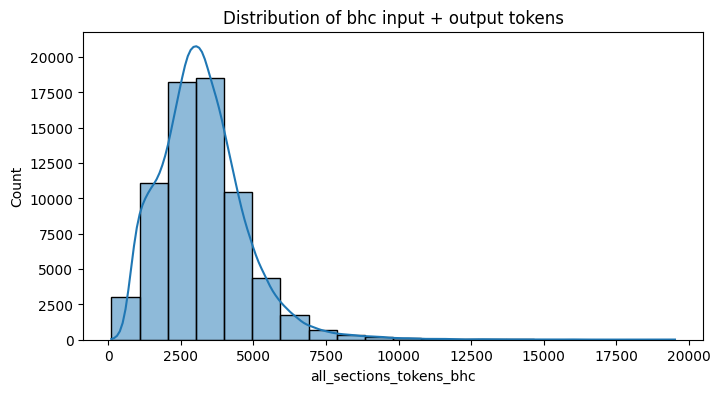

Percentage under 4000 tokens: 73.86% i.e 50807 out of 68785


In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(final_df['all_sections_tokens_bhc'], kde=True, bins=20)
plt.title(f'Distribution of bhc input + output tokens')
plt.show()

max_tok = 3980

print(f"Percentage under {max_tok + 20} tokens: {100 * (final_df['all_sections_tokens_bhc'] < max_tok).sum() / len(final_df):.2f}% i.e {len(final_df[final_df['all_sections_tokens_bhc'] < max_tok])} out of {len(final_df)}")



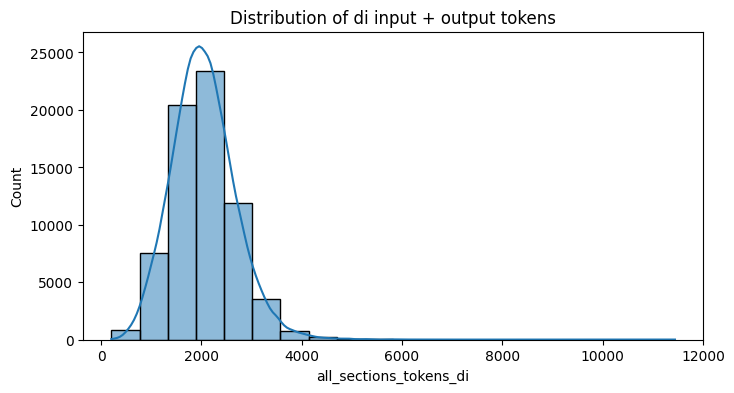

Percentage under 4000 tokens: 99.40% i.e 68371 out of 68785


In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(final_df['all_sections_tokens_di'], kde=True, bins=20)
plt.title(f'Distribution of di input + output tokens')
plt.show()

max_tok = 3980

print(f"Percentage under {max_tok + 20} tokens: {100 * (final_df['all_sections_tokens_di'] < max_tok).sum() / len(final_df):.2f}% i.e {len(final_df[final_df['all_sections_tokens_di'] < max_tok])} out of {len(final_df)}")